# Binary Classification with Logistic Regression
Example from BADS session on predictive analytics.

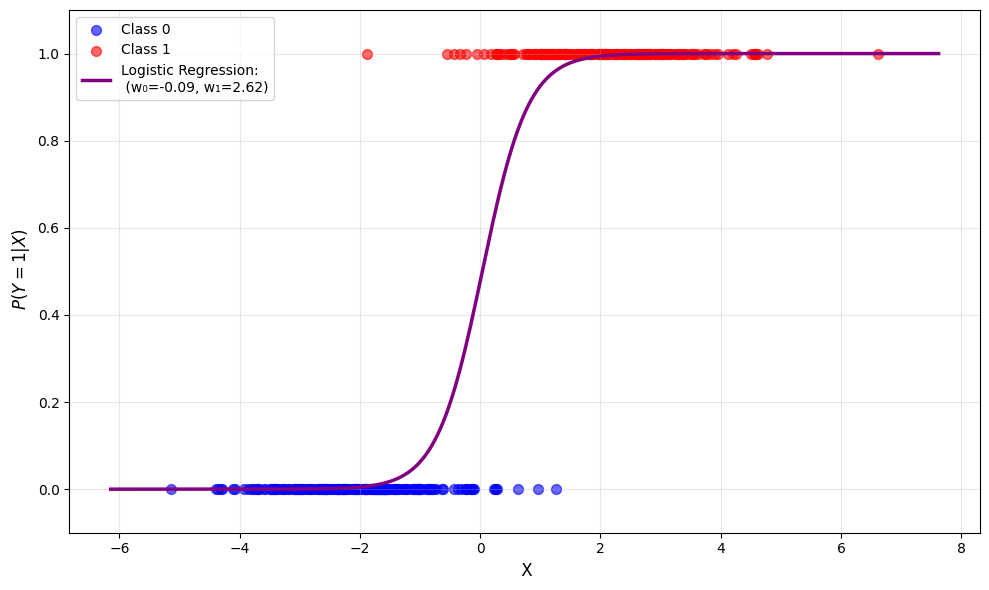

In [11]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Set random seed for reproducibility
np.random.seed(42)

# 1. Generate synthetic data
# Class 0: Gaussian with mean=-2, std=1.2
n_samples = 200
X_class0 = np.random.normal(loc=-2, scale=1.2, size=n_samples)
y_class0 = np.zeros(n_samples)

# Class 1: Gaussian with mean=2, std=1.2
X_class1 = np.random.normal(loc=2, scale=1.2, size=n_samples)
y_class1 = np.ones(n_samples)

# Combine the data
X = np.concatenate([X_class0, X_class1]).reshape(-1, 1)
y = np.concatenate([y_class0, y_class1])

# 2. Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# 3. Create visualization
# Generate points for the regression curve
X_test = np.linspace(X.min() - 1, X.max() + 1, 300).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot of the data points
plt.scatter(X[y == 0], y[y == 0], color='blue', alpha=0.6, label='Class 0', s=50)
plt.scatter(X[y == 1], y[y == 1], color='red', alpha=0.6, label='Class 1', s=50)

# Plot the logistic regression curve (S-shaped function)
legend_entry = f'Logistic Regression:\n (w₀={log_reg.intercept_[0]:.2f}, w₁={log_reg.coef_[0][0]:.2f})'
plt.plot(X_test, y_prob, color='purple', linewidth=2.5, label=legend_entry)

# Add decision boundary (where probability = 0.5)
decision_boundary = X_test[np.argmin(np.abs(y_prob - 0.5))][0]
# Uncomment next line to add decision boundary, assuming that we consider a probability threshold of 0.5 
# plt.axvline(x=decision_boundary, color='black', linestyle='--', linewidth=1.5, label=f'Decision Boundary (x={decision_boundary:.2f})')

# Labels and formatting
plt.xlabel(' X', fontsize=12)
plt.ylabel(' $P( Y=1|X)$', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()